# **About Company**

Ola is one of the leading ride-hailing companies in India, with a focus on providing mobility solutions across cities and rural areas. It partners with thousands of drivers to offer a range of transport services, including cars, auto-rickshaws, and bike taxis. Ola’s drivers form the backbone of its operations, and managing driver retention is crucial for the company’s growth and sustainability.


# **Problem Statement**

Ola, one of India’s leading ride-hailing companies, is grappling with a critical challenge of driver retention. The company heavily relies on its driver-partners, many of whom work as freelancers or independent contractors. High driver attrition poses a persistent threat due to various factors such as:

- **Competitive Pressure**: Drivers can easily switch to rival platforms like Uber, depending on dynamic pricing and incentives.
- **Fluctuating Earnings and Work Conditions**: Inconsistent income opportunities and work conditions contribute to driver dissatisfaction, prompting them to leave.

The **acquisition of new drivers** is both **costly** and **time-consuming**, involving steps like background checks, vehicle inspections, training sessions, and onboarding processes. High turnover rates increase these acquisition costs, impacting the company’s overall profitability.

Moreover, frequent driver attrition results in **inconsistent service levels**, especially during peak hours, leading to lower customer satisfaction and potential loss of market share.

### **Objective**
As a data scientist in the Analytics Department at Ola, you are tasked with developing a predictive model to identify drivers likely to leave the platform. This model should leverage key attributes such as:

- **Demographics**: City, age, gender, etc.
- **Tenure Information**: Joining date, last working date, and duration of service.
- **Historical Performance Data**: Quarterly ratings, monthly business acquired, grade, and income.

### **Goal**
The goal of this predictive model is to proactively identify drivers at risk of leaving, allowing Ola to implement targeted retention strategies. By reducing driver churn, the company can lower acquisition costs, maintain service consistency, and enhance overall customer satisfaction.

# **Feature Description**

1. **MMMM-YY**: Reporting date (Monthly) indicating when the data snapshot was taken for each driver.
2. **Driver_ID**: A unique identifier for each driver.
3. **Age**: The current age of the driver.
4. **Gender**: Categorical representation of gender:
   - Male: `0`
   - Female: `1`
5. **City**: A code representing the city where the driver operates.
6. **Education_Level**: Categorical representation of the driver's education level:
   - 0: 10+ (high school)
   - 1: 12+ (senior secondary)
   - 2: Graduate
7. **Income**: The driver's average monthly income.
8. **Date Of Joining**: The date when the driver joined Ola.
9. **LastWorkingDate**: The last recorded working date for the driver. A null value indicates an active driver.
10. **Joining Designation**: The designation/title given to the driver when they joined.
11. **Grade**: The driver's grade at the time of reporting.
12. **Total Business Value**: The total monthly business value attributed to the driver. Negative values may indicate cancellations, refunds, or adjustments such as car EMIs.
13. **Quarterly Rating**: The performance rating of the driver on a scale of 1 to 5 (higher indicates better performance).

# **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
from sklearn.impute import KNNImputer

# **Configuration**

In [2]:
# Plot style
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

# Max display
pd.set_option('display.max_columns', None)

# Warning suppression
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# **Data**

In [7]:
# Data Acquisition
df = pd.read_csv('ola_driver_scaler.csv')

# Trim and lowercase columns
df.columns = [s.strip().lower() for s in df.columns]
df.columns = df.columns.str.replace(' ', '_')

# Drop 'Unnamed: 0' if it exists
if 'unnamed:_0' in df.columns:
    df = df.drop(columns=['unnamed:_0'])

df

,mmm-yy,driver_id,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


# **Data Info**

The dataset features a mix of object, float, and integer data types, with a total memory usage exceeding 1.9+ MB.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mmm-yy                19104 non-null  object 
 1   driver_id             19104 non-null  int64  
 2   age                   19043 non-null  float64
 3   gender                19052 non-null  float64
 4   city                  19104 non-null  object 
 5   education_level       19104 non-null  int64  
 6   income                19104 non-null  int64  
 7   dateofjoining         19104 non-null  object 
 8   lastworkingdate       1616 non-null   object 
 9   joining_designation   19104 non-null  int64  
 10  grade                 19104 non-null  int64  
 11  total_business_value  19104 non-null  int64  
 12  quarterly_rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


# **DateTime Conversion**

In [8]:
# Convert specified columns to datetime
datetime_cols = ['mmm-yy', 'dateofjoining', 'lastworkingdate']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col])

# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   mmm-yy                19104 non-null  datetime64[ns]
 1   driver_id             19104 non-null  int64         
 2   age                   19043 non-null  float64       
 3   gender                19052 non-null  float64       
 4   city                  19104 non-null  object        
 5   education_level       19104 non-null  int64         
 6   income                19104 non-null  int64         
 7   dateofjoining         19104 non-null  datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   19104 non-null  int64         
 10  grade                 19104 non-null  int64         
 11  total_business_value  19104 non-null  int64         
 12  quarterly_rating      19104 non-null  int64         
dtypes: datetime64[ns

# **Missing Values**

The dataset has missing values in the `age`, `gender`, and `lastworkingdate` columns. The KNNImputer can be employed to impute missing values for the numerical columns, while the `lastworkingdate` should be retained as is, as it will be utilized to define the target feature.

In [9]:
# Function to highlight missing values
def highlight_missing_values(df):
    missing_values_df = df.isnull().sum().to_frame(name='missing_values').reset_index().rename(columns={'index': 'features'})
    total_rows = df.shape[0]
    missing_values_df['missing_percentage'] = (missing_values_df['missing_values'] / total_rows) * 100
    missing_values_df['missing_percentage'] = missing_values_df['missing_percentage'].round(2)

    def highlight_missing(val):
        return 'background-color: orange; color: black; border: 1px solid black' if val > 0 else ''

    styled_missing_value_df = missing_values_df.style.map(highlight_missing, subset=['missing_values'])
    styled_missing_value_df = styled_missing_value_df.map(highlight_missing, subset=['missing_percentage'])

    return styled_missing_value_df

# Highlight missing values in the DataFrame
styled_df = highlight_missing_values(df)
styled_df

,features,missing_values,missing_percentage
0,mmm-yy,0,0.000000
1,driver_id,0,0.000000
2,age,61,0.320000
3,gender,52,0.270000
4,city,0,0.000000
5,education_level,0,0.000000
6,income,0,0.000000
7,dateofjoining,0,0.000000
8,lastworkingdate,17488,91.540000
9,joining_designation,0,0.000000


## **KNN Imputation**

In [10]:
from sklearn.impute import KNNImputer

# KNN Imputation
k = 5
imputer = KNNImputer(n_neighbors=k)
imputed_df = imputer.fit_transform(df[['age']])

# Combine imputed 'age' with other columns
other_cols_df = df.drop(columns=['age'])
imputed_df = pd.concat([pd.DataFrame(imputed_df, columns=['age']), other_cols_df], axis=1)

# Display DataFrame info after imputation
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   19104 non-null  float64       
 1   mmm-yy                19104 non-null  datetime64[ns]
 2   driver_id             19104 non-null  int64         
 3   gender                19052 non-null  float64       
 4   city                  19104 non-null  object        
 5   education_level       19104 non-null  int64         
 6   income                19104 non-null  int64         
 7   dateofjoining         19104 non-null  datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   19104 non-null  int64         
 10  grade                 19104 non-null  int64         
 11  total_business_value  19104 non-null  int64         
 12  quarterly_rating      19104 non-null  int64         
dtypes: datetime64[ns

## **Mode Imputation**

In [11]:
# Mode Imputation for 'gender'
imputed_df['gender'] = imputed_df['gender'].fillna(imputed_df['gender'].mode()[0])

# Display DataFrame info after gender imputation
imputed_df.info()

# Count of unique values in 'gender'
gender_counts = imputed_df['gender'].value_counts()
gender_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   19104 non-null  float64       
 1   mmm-yy                19104 non-null  datetime64[ns]
 2   driver_id             19104 non-null  int64         
 3   gender                19104 non-null  float64       
 4   city                  19104 non-null  object        
 5   education_level       19104 non-null  int64         
 6   income                19104 non-null  int64         
 7   dateofjoining         19104 non-null  datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   19104 non-null  int64         
 10  grade                 19104 non-null  int64         
 11  total_business_value  19104 non-null  int64         
 12  quarterly_rating      19104 non-null  int64         
dtypes: datetime64[ns

gender
0.0    11126
1.0     7978
Name: count, dtype: int64

In [12]:
imputed_df['gender'].value_counts()

gender
0.0    11126
1.0     7978
Name: count, dtype: int64

# **Data Consolidation**

Each row in the dataset represents a monthly record for an individual driver, allowing for multiple entries corresponding to different reporting months. By consolidating the data based on the Driver ID, we can gain a comprehensive understanding of each driver's overall impact and performance over time.

In [13]:
# Consolidate DataFrame by grouping
consolidated_df = imputed_df.groupby('driver_id').agg({
    'mmm-yy': 'first',
    'age': 'max',
    'gender': 'last',
    'city': 'last',
    'education_level': 'last',
    'income': 'last',
    'dateofjoining': 'last',
    'lastworkingdate': 'last',
    'joining_designation': 'last',
    'grade': 'last',
    'total_business_value': 'sum',
    'quarterly_rating': 'last',
}).reset_index()

# Optional: Rename columns for clarity
# consolidated_df.columns = [
#     'driver_id',
#     'mmm_yy_first', 
#     'age',
#     'gender',
#     'city',
#     'education_level',
#     'income',
#     'date_of_joining',
#     'last_working_date',
#     'joining_designation',
#     'grade',
#     'total_business_value',
#     'quarterly_rating'
# ]

# Display the consolidated DataFrame
consolidated_df

,driver_id,mmm-yy,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,4
2377,2785,2020-08-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1
2378,2786,2019-01-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1
2379,2787,2019-01-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1


# **Float64/Int64 to Int32**

This helps in reducing memory usage


In [14]:
# Convert float64 and int64 columns to int32
# Convert numeric columns to more efficient data types
for col in consolidated_df.select_dtypes(np.number).columns:
    if consolidated_df[col].dtype == 'int64':
        consolidated_df[col] = consolidated_df[col].astype('int32')
    else:
        consolidated_df[col] = consolidated_df[col].astype('float32')

# Display DataFrame info after type conversion
consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   driver_id             2381 non-null   int32         
 1   mmm-yy                2381 non-null   datetime64[ns]
 2   age                   2381 non-null   float32       
 3   gender                2381 non-null   float32       
 4   city                  2381 non-null   object        
 5   education_level       2381 non-null   int32         
 6   income                2381 non-null   int32         
 7   dateofjoining         2381 non-null   datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   2381 non-null   int32         
 10  grade                 2381 non-null   int32         
 11  total_business_value  2381 non-null   int32         
 12  quarterly_rating      2381 non-null   int32         
dtypes: datetime64[ns](

In [15]:
consolidated_df

,driver_id,mmm-yy,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,4
2377,2785,2020-08-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1
2378,2786,2019-01-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1
2379,2787,2019-01-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1


# **Target Features**

If a driver has a recorded last_working_date, they are considered to have churned, indicating that they have left the organization.

In [16]:
# Add 'churned' column based on 'lastworkingdate'
consolidated_df['churned'] = np.where(consolidated_df['lastworkingdate'].isnull(), 0, 1)

# Optional: Drop 'lastworkingdate' column if needed
# consolidated_df = consolidated_df.drop(columns=['lastworkingdate'])

# Display the updated DataFrame
consolidated_df

,driver_id,mmm-yy,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating,churned
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,4,0
2377,2785,2020-08-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1,1
2378,2786,2019-01-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1,1
2379,2787,2019-01-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1,1


# **Additional Features**

Several factors may contribute to a driver’s overall satisfaction:

- `quarterly_inc`: Indicates an improvement in the driver’s quarterly rating.
- `income_inc`: Represents an increase in the driver’s average monthly income.

This highlights key performance and income-related trends that could impact driver retention.

In [17]:
# Sort the DataFrame by 'driver_id' and 'mmm-yy'
sorted_df = df.sort_values(by=['driver_id', 'mmm-yy'])

# Quarterly increase feature
qrf = sorted_df.groupby('driver_id').agg({'quarterly_rating': 'first'})
qrl = sorted_df.groupby('driver_id').agg({'quarterly_rating': 'last'})
consolidated_df['quarterly_inc'] = np.where(qrl['quarterly_rating'] - qrf['quarterly_rating'] > 0, 1, 0)


In [18]:
# Income increase feature
inc_f = sorted_df.groupby('driver_id').agg({'income': 'first'})
inc_l = sorted_df.groupby('driver_id').agg({'income': 'last'})
consolidated_df['income_inc'] = np.where(inc_l['income'] - inc_f['income'] > 0, 1, 0)

# Display the updated DataFrame
consolidated_df

,driver_id,mmm-yy,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating,churned,quarterly_inc,income_inc
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,0,0
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1,0,0
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1,0,0
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,4,0,1,0
2377,2785,2020-08-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1,1,0,0
2378,2786,2019-01-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1,1,0,0
2379,2787,2019-01-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1,1,0,0


In [19]:
consolidated_df

,driver_id,mmm-yy,age,gender,city,education_level,income,dateofjoining,lastworkingdate,joining_designation,grade,total_business_value,quarterly_rating,churned,quarterly_inc,income_inc
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,0,0
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,1,0,0
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,1,0,0
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2019-01-01,34.0,0.0,C24,0,82815,2015-10-15,NaT,2,3,21748820,4,0,1,0
2377,2785,2020-08-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28,1,1,0,1,1,0,0
2378,2786,2019-01-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22,2,2,2815090,1,1,0,0
2379,2787,2019-01-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20,1,1,977830,1,1,0,0


In [20]:
# Create a copy of the consolidated DataFrame
new_df = consolidated_df.copy()

# Display DataFrame info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   driver_id             2381 non-null   int32         
 1   mmm-yy                2381 non-null   datetime64[ns]
 2   age                   2381 non-null   float32       
 3   gender                2381 non-null   float32       
 4   city                  2381 non-null   object        
 5   education_level       2381 non-null   int32         
 6   income                2381 non-null   int32         
 7   dateofjoining         2381 non-null   datetime64[ns]
 8   lastworkingdate       1616 non-null   datetime64[ns]
 9   joining_designation   2381 non-null   int32         
 10  grade                 2381 non-null   int32         
 11  total_business_value  2381 non-null   int32         
 12  quarterly_rating      2381 non-null   int32         
 13  churned           

# **Class Imbalance**

The dataset exhibits a class imbalance, with 67.87% of drivers identified as churned, while the remaining 32.13% are retained. This shows most of the driver leave the company for better opportunities or some other reasons.

Also, future steps may require balancing the classes through techniques like SMOTE or applying class weights during model training.



Class Imbalance:
churned
1    1616
0     765
Name: count, dtype: int64


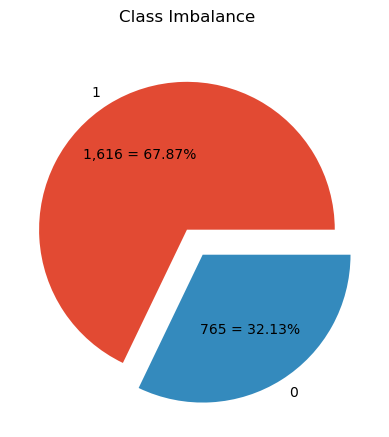

In [21]:
# Class Imbalance Analysis
counts = new_df['churned'].value_counts()
print(f"Class Imbalance:\n{counts}")

# Plotting the class imbalance
plt.pie(
    x=counts.values, labels=counts.index,
    autopct=lambda x: '{:,.0f} = {:.2f}%'.format(
        x * counts.sum() / 100, x),
    explode=[0.1] * len(counts)  # Adjust for number of classes
)

plt.suptitle('Class Imbalance')
plt.show()

# **Descriptive Analysis**
The analysis reveals the following key characteristics:

* **Age:** Drivers range in age from 21 to 58 years old.
* **Income:** Monthly income varies significantly, with a minimum of ₹10,747.0 and a maximum of ₹188,418.0.
* **Grade:** Drivers are categorized into five grades, ranging from 1 to 5.
* **Joining Designation:** Similar to grades, joining designations span from 1 to 5.
* **Quarterly Rating:** Quarterly ratings are assessed on a scale of 1 to 4.
* **Total Business Value:** This metric exhibits a wide range, including negative values indicative of loan deductions and reaching as high as ₹95,331,056.0. The exceptionally high value suggests potential involvement of vendors or larger-scale operations.
* **Education Level:** Education levels are classified on a scale of 0 to 2.

In [22]:
# Display descriptive statistics for the new DataFrame
description = new_df.describe(include='all').T
description

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
driver_id,2381.0,NaN,NaN,NaN,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
mmm-yy,2381,NaN,NaN,NaN,2019-08-30 15:12:37.496849920,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-07-01 00:00:00,2020-05-01 00:00:00,2020-12-01 00:00:00,NaN
age,2381.0,NaN,NaN,NaN,33.804325,21.0,30.0,33.0,37.0,58.0,5.90911
gender,2381.0,NaN,NaN,NaN,0.408652,0.0,0.0,0.0,1.0,1.0,0.491686
city,2381,29,C20,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_level,2381.0,NaN,NaN,NaN,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
income,2381.0,NaN,NaN,NaN,59334.157077,10747.0,39104.0,55315.0,75986.0,188418.0,28383.666384
dateofjoining,2381,NaN,NaN,NaN,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
lastworkingdate,1616,NaN,NaN,NaN,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
joining_designation,2381.0,NaN,NaN,NaN,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433


# **Categorical Feature Distribution**

Based on the categorical feature distribution, we observe the following trends:

- **Gender:** Male drivers outnumber female drivers.
- **Education Level:** Drivers are evenly distributed across various education levels.
- **Quarterly Rating Increase:** The majority of drivers have either no increase (0) or a minimal increase (1) in their quarterly rating.
- **Income Increase:** There is minimal growth in driver income.
- **Quarterly Rating:** The lowest rating (1) is the most common among drivers.
- **Grade:** Grade 2 is the most prevalent among drivers, followed by grades 1 and 3.
- **Joining Designation:** The majority of drivers start at designation 1, with designations 2 and 3 being less common.
- **City:** City C20 has the highest concentration of active drivers, while other cities have relatively equal representation.

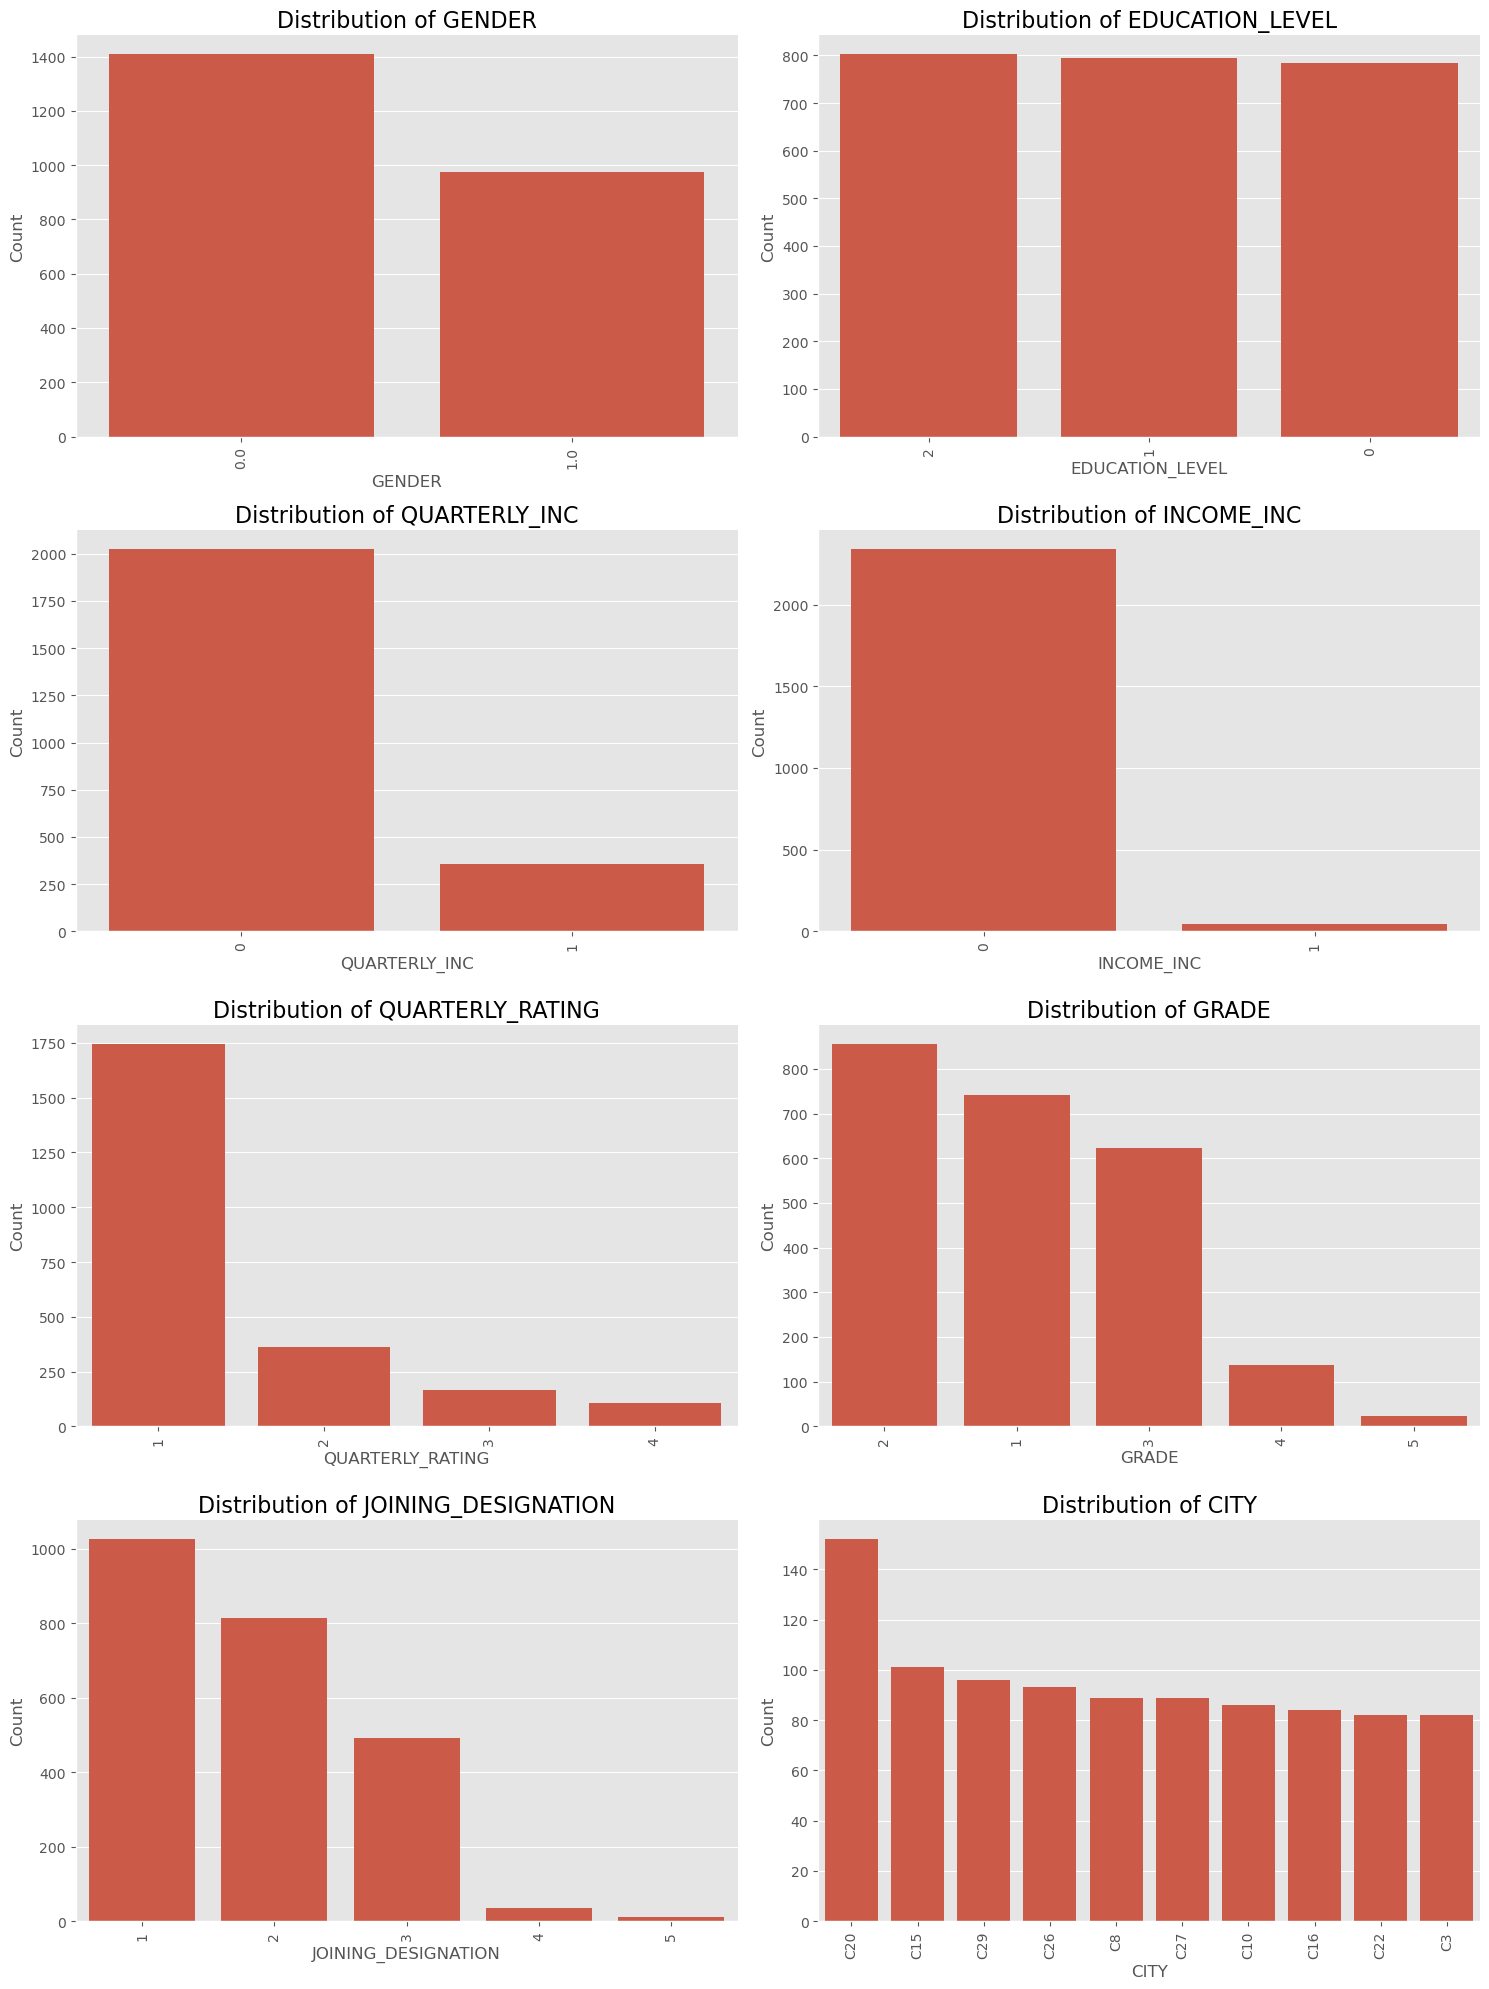

In [23]:
# Defining categorical columns
categorical_cols = [
    'gender', 
    'education_level', 
    'quarterly_inc', 
    'income_inc', 
    'quarterly_rating', 
    'grade', 
    'joining_designation', 
    'city'
]

# Set up the number of plots
num_cols = 2
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Plotting each categorical column
for i, col in enumerate(categorical_cols):
    top_n = 10
    top_categories = new_df[col].value_counts().head(top_n)

    sns.countplot(data=new_df, x=col, order=top_categories.index, ax=axes[i])
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col.upper(), fontsize=12)
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=16)
    axes[i].tick_params(axis='x', rotation=90)
    sns.despine(ax=axes[i])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Continouse Features Distribution**

The continuous feature distributions reveal the following:

- **Total Business Value:**  
  The distribution is **highly right-skewed**, with the presence of extreme values. This skewness suggests a mix of high-level vendors and individual drivers, with the majority of drivers contributing minimally to the total business value.

- **Income:**  
  The distribution shows a **slight right skew**, indicating that most drivers earn a moderate income, while a smaller group of drivers earn significantly higher amounts.

To address the skewness and outliers, applying a log transformation or outlier clipping may be beneficial in normalizing the features.

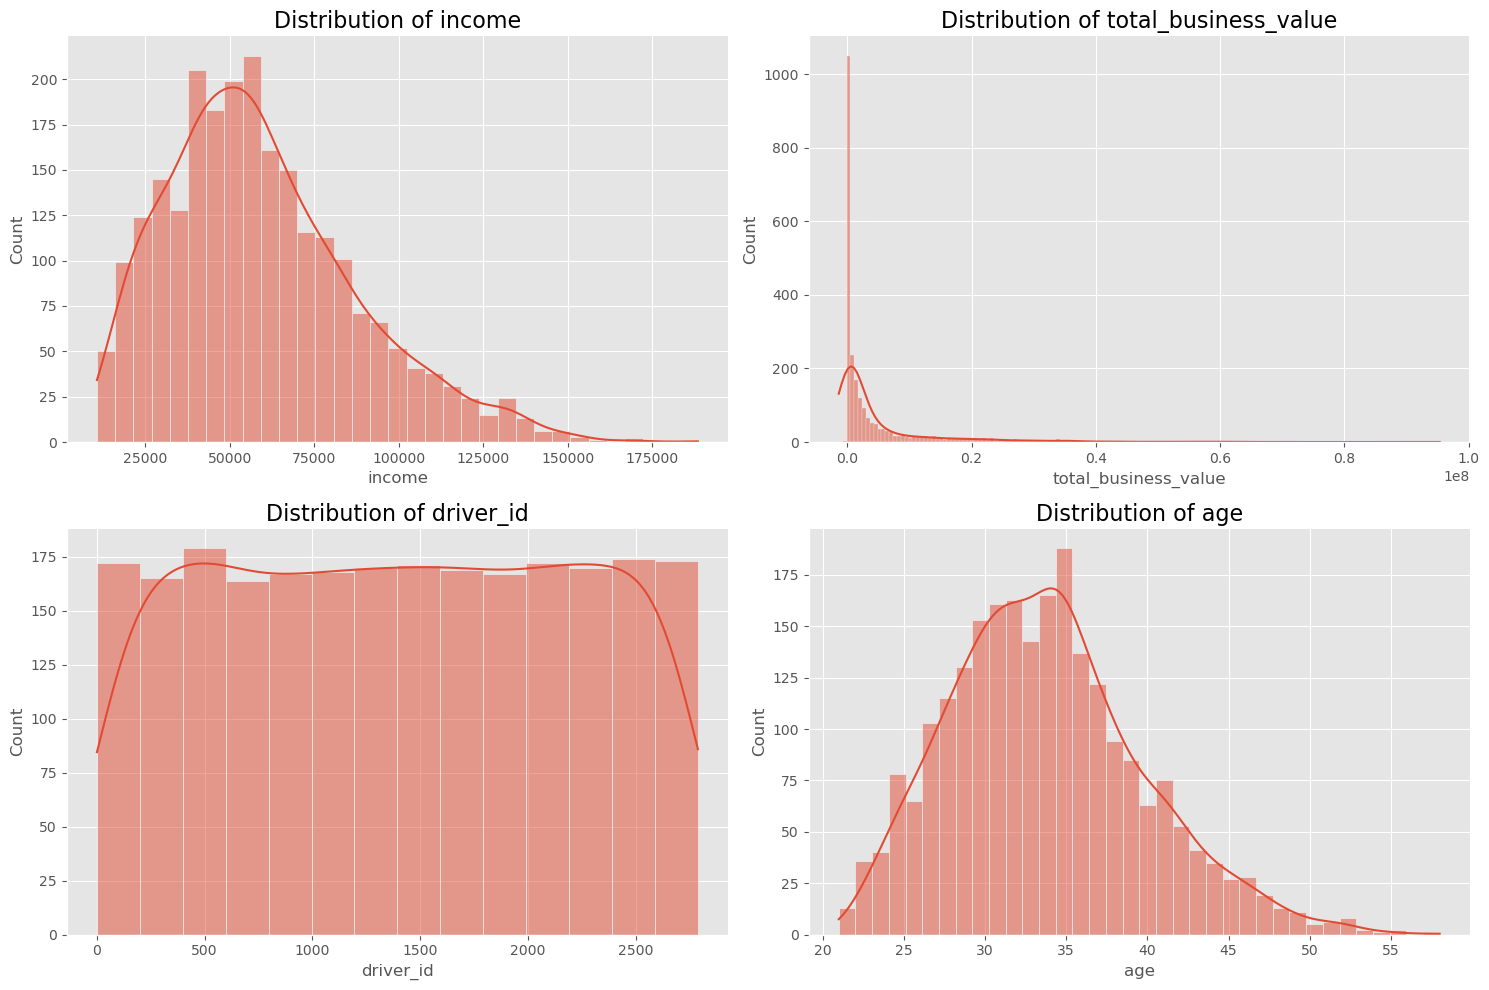

In [24]:
# Identify continuous columns
continuous_cols = new_df[list(set(new_df.columns) - set(categorical_cols) - set(['churned']))].select_dtypes(np.number).columns

# Set up the number of plots
num_cols = 2
num_plots = len(continuous_cols)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Plotting each continuous column
for i, col in enumerate(continuous_cols):
    sns.histplot(data=new_df, x=col, kde=True, ax=axes[i])
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    sns.despine(ax=axes[i])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Clipping**

In [25]:
def iqr_clipping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply IQR clipping to each continuous column
for col in continuous_cols:
    new_df[col] = iqr_clipping(new_df, col)

## **Distribution after Clipping**

The data now appears more normalized and easier to interpret, enhancing the effectiveness of subsequent analysis.

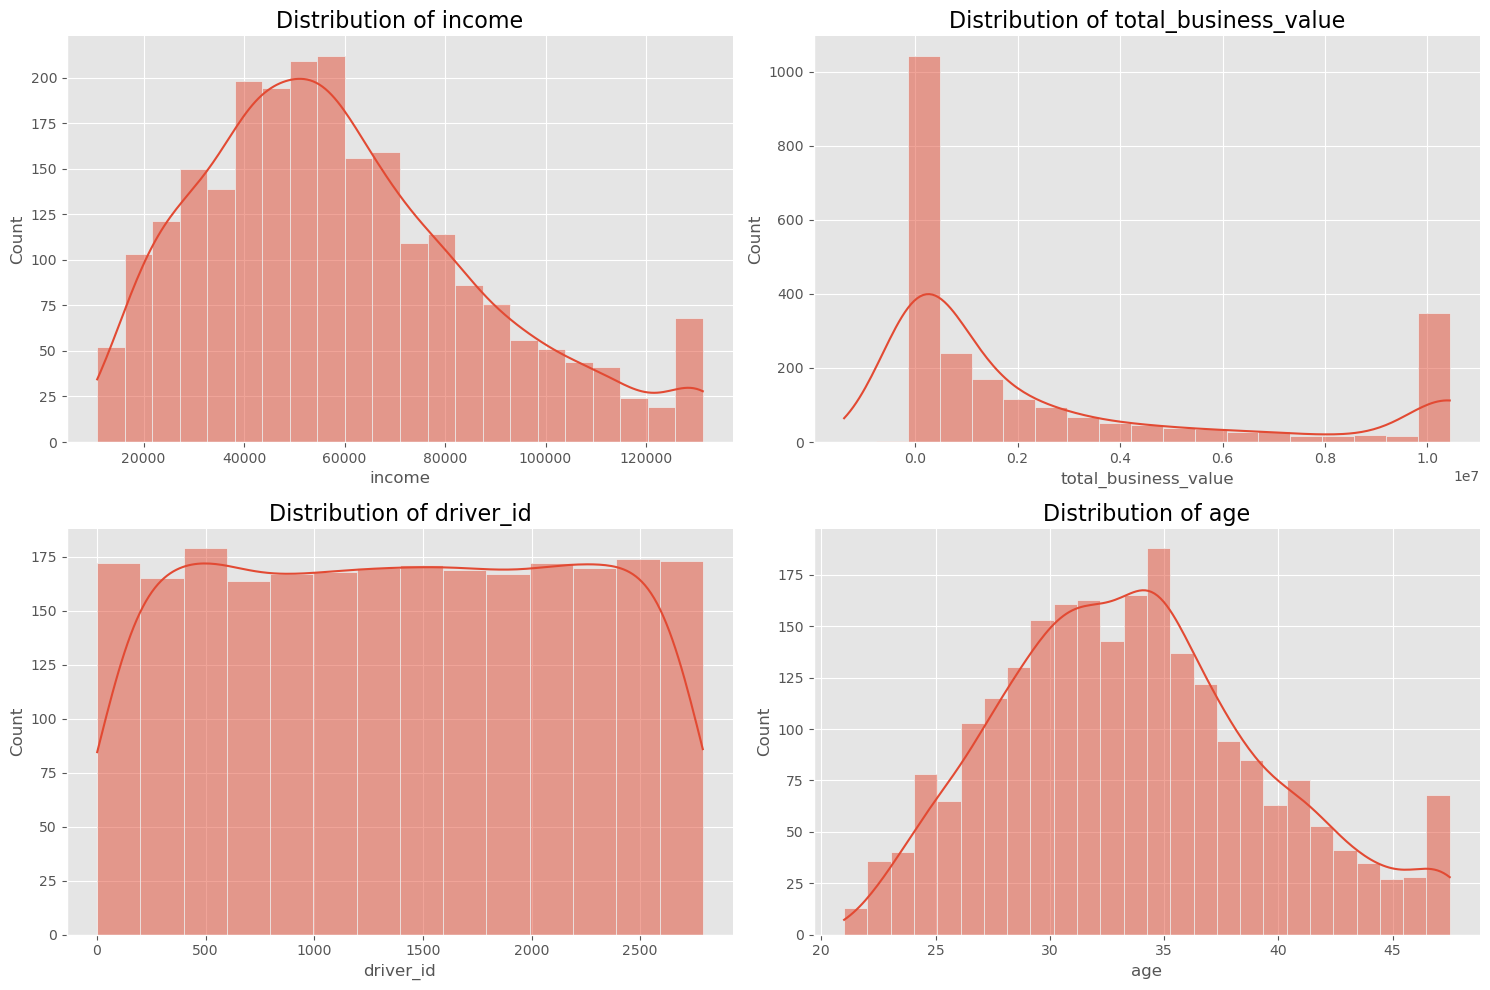

In [26]:
# Set up the number of plots
num_cols = 2
num_plots = len(continuous_cols)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Plotting each continuous column
for i, col in enumerate(continuous_cols):
    sns.histplot(data=new_df, x=col, kde=True, ax=axes[i])
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    sns.despine(ax=axes[i])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Pair Plot with Hue**

## **Hue as Churn Rate**

The pairplot with hue as "Churned" reveals the following trends:

- **Total Business Value:**  
  Drivers with low total business values are more likely to churn compared to those with higher values.

- **Income:**  
  Drivers with lower incomes exhibit a higher churn rate, which is comparable to those with higher incomes.

- **Gender:**  
  Both genders have a higher churn rate than retention, with males showing a slightly higher churn rate compared to females.

- **Education Level:**  
  Regardless of the designation, the churn rate remains consistently high across all education levels.

- **Quarterly Increase:**  
  Drivers who did not experience an increase in their quarterly rating show a higher churn rate. In contrast, those with a rating increase have a lower churn rate.

- **Income Increase:**  
  The churn trend in relation to income increase mirrors that of the quarterly rating increase: those with no increase have a higher churn rate.

- **Quarterly Rating:**  
  Drivers with higher quarterly ratings tend to have a lower churn rate.

- **Grade:**  
  Higher grades are associated with a slightly reduced churn rate.

- **Joining Designation:**  
  Churn occurs irrespective of the initial designation at the time of joining.

- **City:**  
  The churn rate is high across all cities, with the majority of churned drivers originating from City C20.

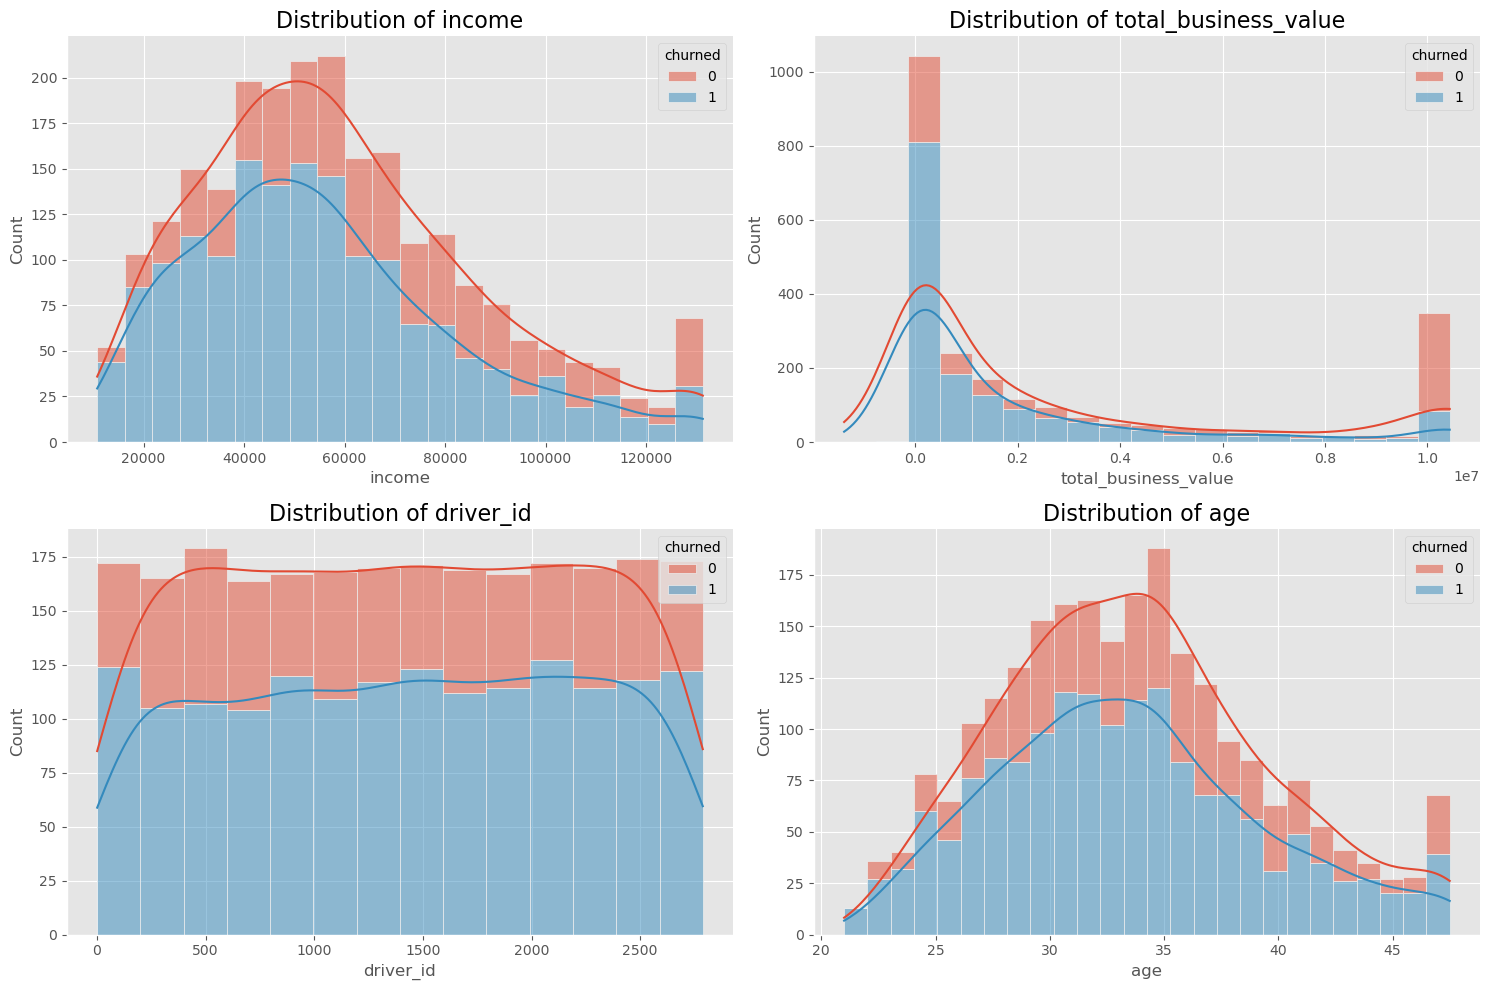

In [27]:
# Set up the number of plots
num_cols = 2
num_plots = len(continuous_cols)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Plotting each continuous column with 'churned' hue
for i, col in enumerate(continuous_cols):
    sns.histplot(data=new_df, x=col, kde=True, hue='churned', ax=axes[i], multiple="stack")
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    sns.despine(ax=axes[i])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

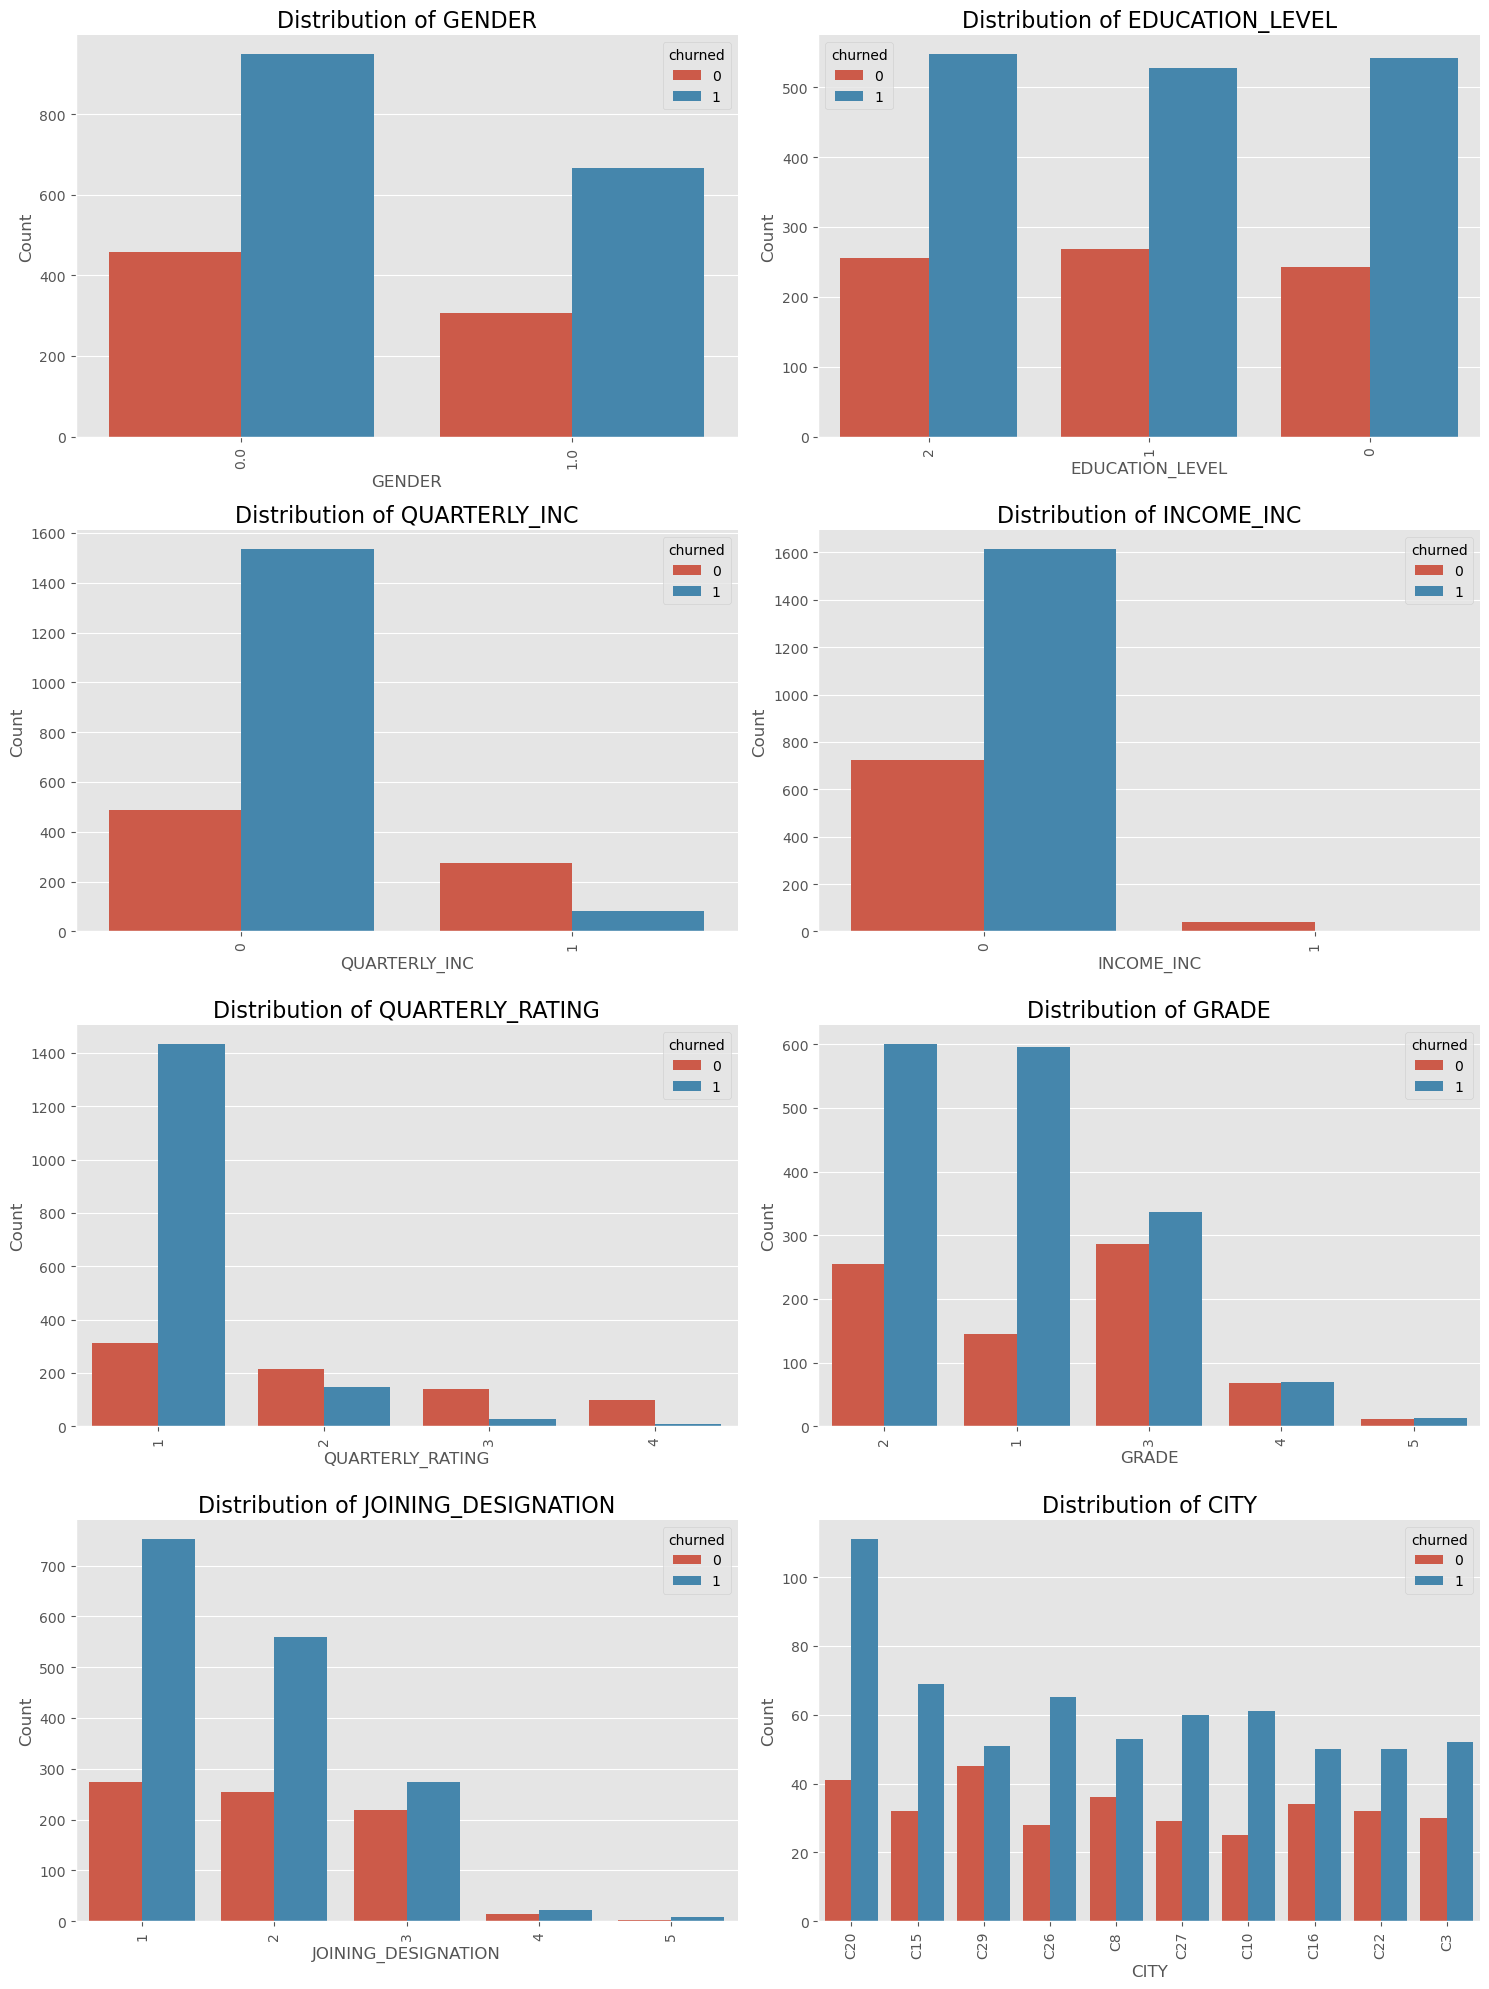

In [28]:
# Set up the number of plots
num_cols = 2
num_plots = len(categorical_cols)
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Plotting each categorical column with 'churned' hue
for i, col in enumerate(categorical_cols):
    top_n = 10
    top_categories = new_df[col].value_counts().head(top_n)

    sns.countplot(data=new_df, x=col, hue='churned', order=top_categories.index, ax=axes[i])
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(col.upper(), fontsize=12)
    axes[i].set_title(f'Distribution of {col.upper()}', fontsize=16)
    axes[i].tick_params(axis='x', rotation=90)
    sns.despine(ax=axes[i])

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Joining Cohort Analysis**

The churn rate is at its lowest for the cohort that joined in 2014, reaching about 30%. This suggests that drivers who joined in 2014 were more likely to stay on the platform compared to other years.

Starting from the 2014 cohort, there is a steady increase in churn rate, peaking for the 2018 cohort at around 90%.

Interestingly, the churn rate drops sharply for the 2019 and 2020 cohorts, with 2020 showing the lowest churn rate (close to 50%).

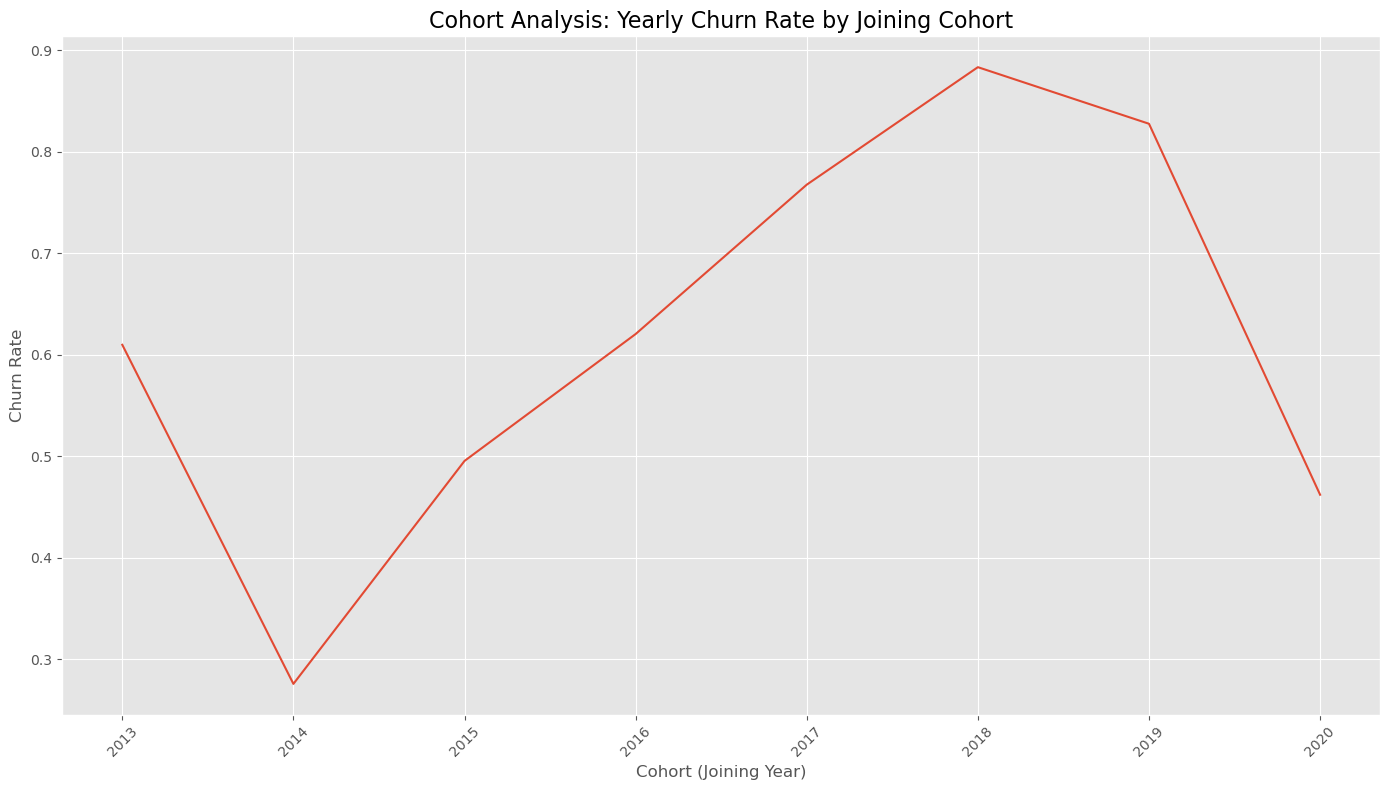

In [29]:
# Extracting year from the 'dateofjoining' column
new_df['dateofjoining_year'] = new_df['dateofjoining'].dt.to_period("Y")

# Calculating the mean churn rate by year of joining
cohort_churn = new_df.groupby('dateofjoining_year')['churned'].mean().reset_index()
cohort_churn['dateofjoining_year'] = cohort_churn['dateofjoining_year'].astype(str)

# Plotting the cohort analysis
plt.figure(figsize=(14, 8))
sns.lineplot(data=cohort_churn, x='dateofjoining_year', y='churned')
plt.title("Cohort Analysis: Yearly Churn Rate by Joining Cohort", fontsize=16)
plt.xlabel("Cohort (Joining Year)", fontsize=12)
plt.ylabel("Churn Rate", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.locator_params(axis='x', nbins=12)
plt.tight_layout()
plt.show()

# **Income vs Total Business Value**

Drivers with lower income and lower total business value show a higher likelihood of churn. In contrast, drivers with higher total business value tend to be more likely to remain on the platform.

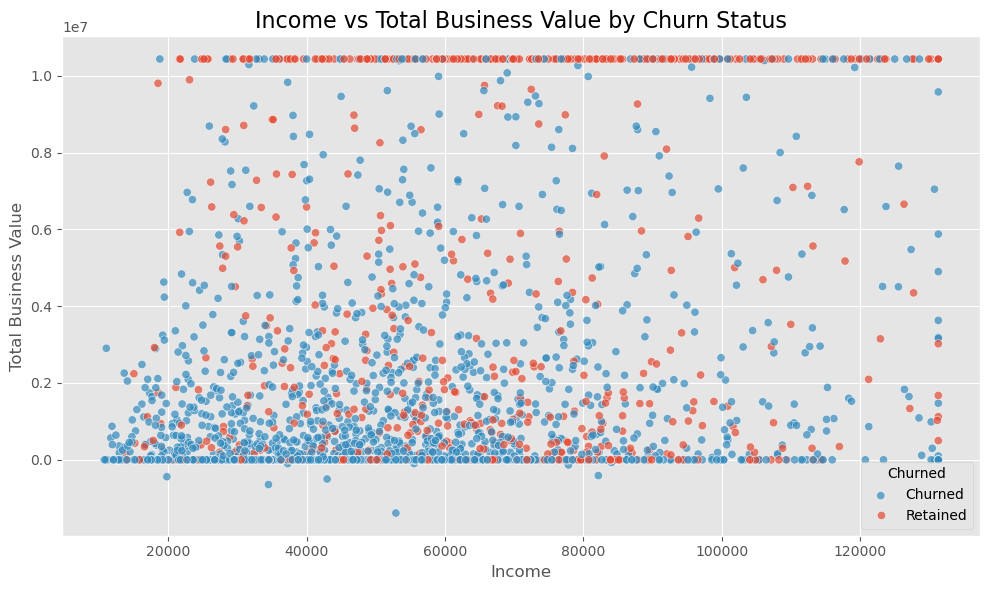

In [30]:
# Create a scatter plot of income vs total business value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='income', y='total_business_value', hue='churned', alpha=0.7)
plt.title("Income vs Total Business Value by Churn Status", fontsize=16)
plt.xlabel("Income", fontsize=12)
plt.ylabel("Total Business Value", fontsize=12)
plt.legend(title="Churned", labels=['Churned', 'Retained'])
plt.tight_layout()
plt.show()

# **Income vs. Churn**

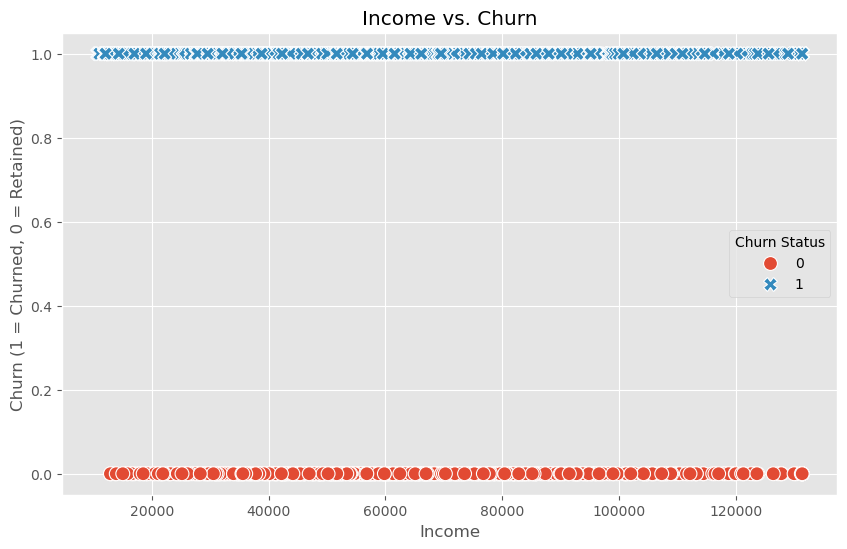

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='income', y='churned', hue='churned', style='churned', s=100)
plt.title('Income vs. Churn')
plt.xlabel('Income')
plt.ylabel('Churn (1 = Churned, 0 = Retained)')
plt.legend(title='Churn Status')
plt.show()

# **City-wise Churn Distribution**

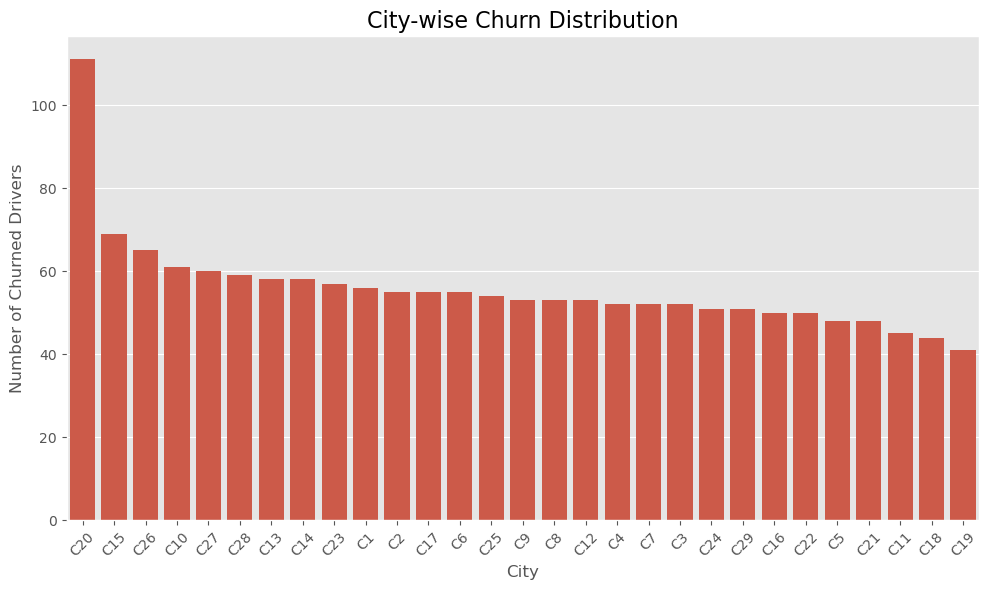

In [32]:
# Create a bar plot for city-wise churn distribution
plt.figure(figsize=(10, 6))
churn_city = new_df[new_df['churned'] == 1]['city'].value_counts()
sns.barplot(x=churn_city.index, y=churn_city.values)
plt.title('City-wise Churn Distribution', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Churned Drivers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Quarterly Ratings Distribution**

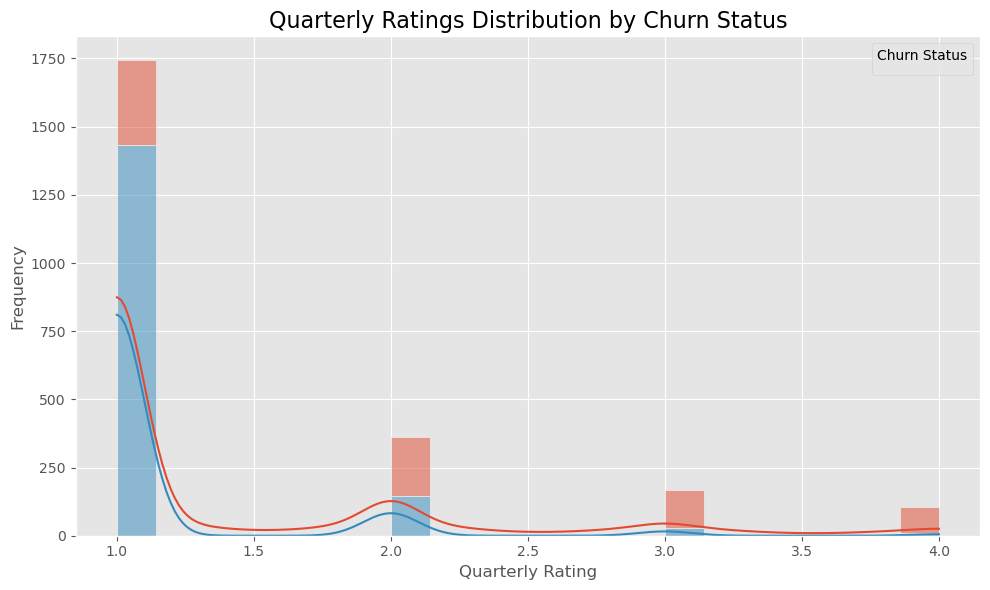

In [33]:
# Create a histogram for quarterly ratings distribution by churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='quarterly_rating', hue='churned', multiple='stack', kde=True)
plt.title('Quarterly Ratings Distribution by Churn Status', fontsize=16)
plt.xlabel('Quarterly Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

In [34]:
# Import necessary libraries


# Assuming new_df is already defined

# Drop specified columns from the DataFrame
new_df.drop(columns=['mmm-yy', 'dateofjoining', 'lastworkingdate', 'driver_id'], inplace=True, errors='ignore')

# Display the updated DataFrame
new_df

,age,gender,city,education_level,income,joining_designation,grade,total_business_value,quarterly_rating,churned,quarterly_inc,income_inc,dateofjoining_year
0,28.0,0.0,C23,2,57387,1,1,1715580,2,1,0,0,2018
1,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0,2020
2,43.0,0.0,C13,2,65603,2,2,350000,1,1,0,0,2019
3,29.0,0.0,C9,0,46368,1,1,120360,1,1,0,0,2019
4,31.0,1.0,C11,1,78728,3,3,1265000,2,0,1,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,C24,0,82815,2,3,10434125,4,0,1,0,2015
2377,34.0,1.0,C9,0,12105,1,1,0,1,1,0,0,2020
2378,45.0,0.0,C19,0,35370,2,2,2815090,1,1,0,0,2018
2379,28.0,1.0,C20,2,69498,1,1,977830,1,1,0,0,2018


# **Train Test Split**

In [35]:
# Import the necessary library for splitting the dataset
from sklearn.model_selection import train_test_split

# Define features and target variable
x = new_df.drop(columns='churned', errors='ignore')  # Features
y = new_df['churned']  # Target variable

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1904, 12), (477, 12), (1904,), (477,))

# **Label Encoding**

In [36]:
# Import the necessary library for label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns and 'dateofjoining_year'
for col in categorical_cols + ['dateofjoining_year']:
    xtrain[col] = encoder.fit_transform(xtrain[col])
    xtest[col] = encoder.transform(xtest[col])

# Display the transformed training set
xtrain

,age,gender,city,education_level,income,joining_designation,grade,total_business_value,quarterly_rating,quarterly_inc,income_inc,dateofjoining_year
457,28.0,0,1,0,87872,2,2,0,0,0,0,7
1739,34.0,0,12,0,38619,1,1,466160,0,0,0,6
1848,27.0,0,28,0,53105,0,1,0,0,0,0,4
1410,30.0,1,14,2,34234,0,0,3489080,1,1,0,6
829,47.0,0,14,0,90484,0,2,10434125,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,27.0,0,23,1,63402,1,1,0,0,0,0,7
1095,26.0,1,26,1,52789,0,0,1227460,0,0,0,5
1130,39.0,1,26,1,17493,0,0,478360,0,0,0,5
1294,31.0,0,12,1,31401,0,0,0,0,0,0,7


# **MinMax Scaling**

In [37]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and testing sets
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Display the scaled training set
xtrain_scaled

array([[0.26415094, 0.        , 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       [0.49056604, 0.        , 0.42857143, ..., 0.        , 0.        ,
        0.85714286],
       [0.22641509, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57142857],
       ...,
       [0.67924528, 1.        , 0.92857143, ..., 0.        , 0.        ,
        0.71428571],
       [0.37735849, 0.        , 0.42857143, ..., 0.        , 0.        ,
        1.        ],
       [0.37735849, 0.        , 0.10714286, ..., 0.        , 0.        ,
        1.        ]])

# **Correlation Matrix**

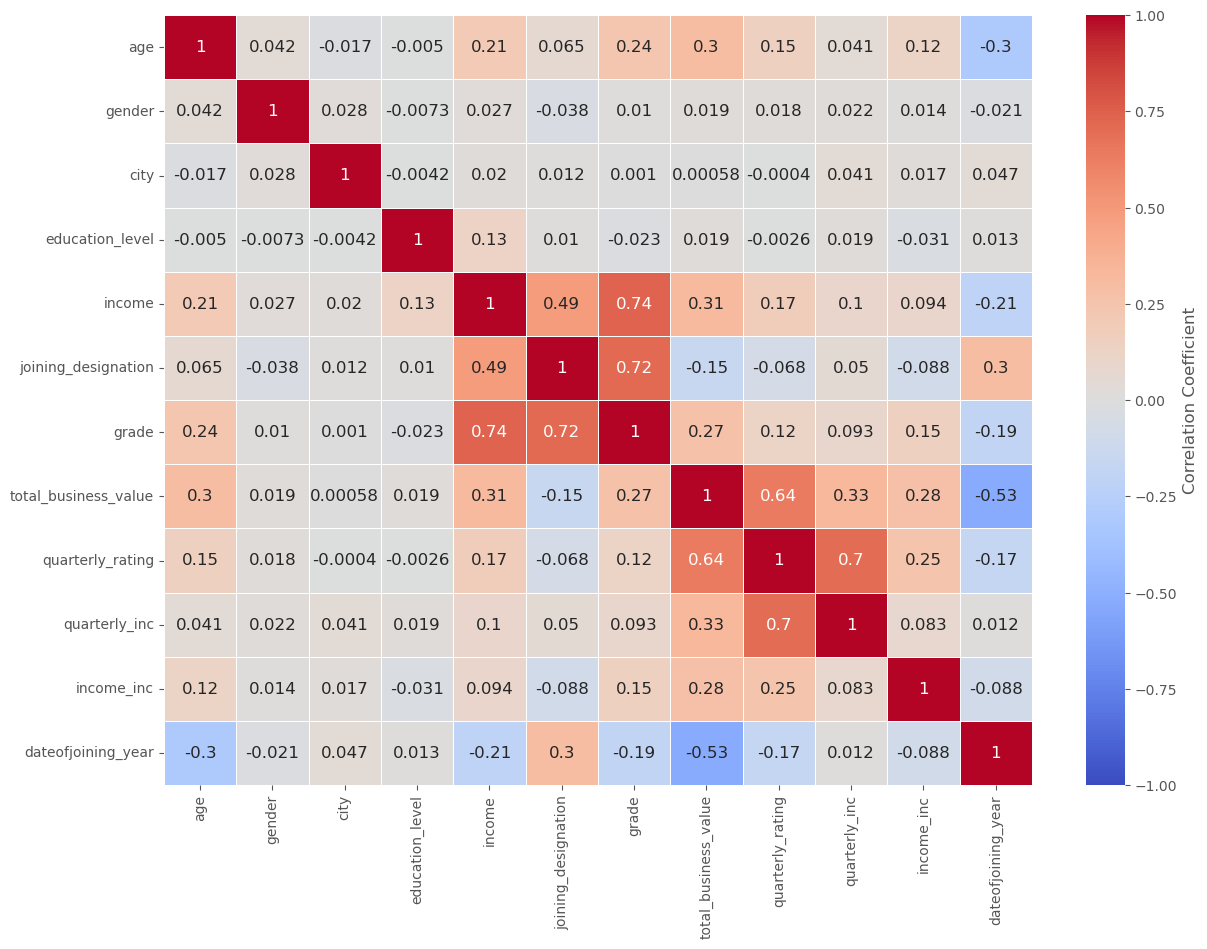

In [38]:
# Calculate the correlation matrix
df_corr = xtrain.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(14, 10))

# Create the heatmap
heatmap = sns.heatmap(
    df_corr,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 12},
    cbar_kws={'label': 'Correlation Coefficient'}
)

# Show the heatmap
plt.show()

# **Performance Metrics**

In [39]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_performance(model, model_name, X_test, y_test, results):
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Save the results
    results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Test ROC-AUC': roc_auc
    }

    # Visualize the results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {model_name}')

    # ROC Curve
    axes[1].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='r')
    axes[1].set_title(f'ROC Curve - {model_name}')
    axes[1].legend()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)
    axes[2].plot(recall_vals, precision_vals, label='Precision-Recall Curve')
    axes[2].set_title(f'Precision-Recall Curve - {model_name}')

    plt.tight_layout()
    plt.show()

results = {}

# **Logistic Regression**

In [40]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
param_lr = {
    'C': [0.01, 0.1, 1, 10.0],
    'max_iter': [100, 200, 500]
}

# Create the GridSearchCV object
lr_model = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', penalty='l2', class_weight='balanced', random_state=42),
    param_grid=param_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model to the training data
lr_model.fit(xtrain_scaled, ytrain)

# Retrieve the best parameters and the best score
best_params = lr_model.best_params_
best_score = lr_model.best_score_

best_params, best_score

({'C': 10.0, 'max_iter': 100}, 0.8675554996433142)

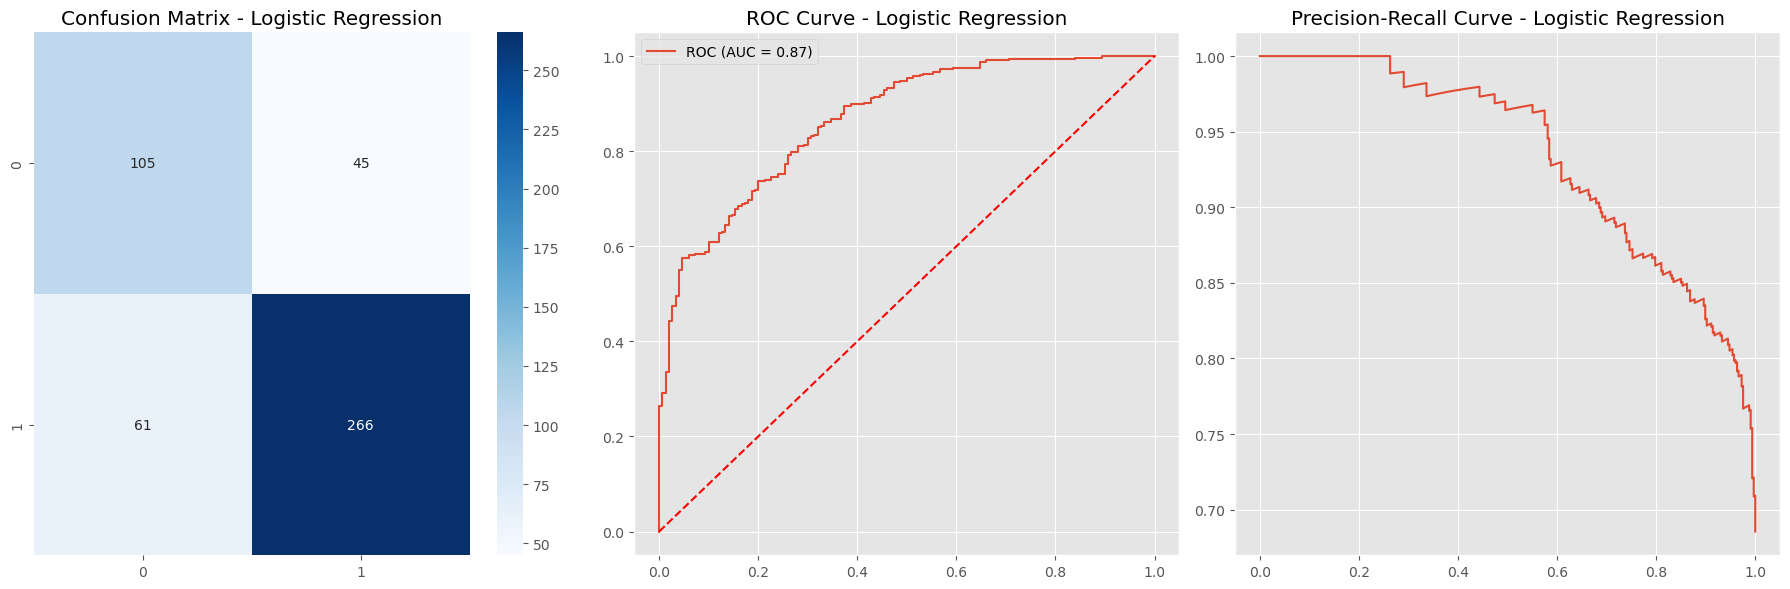

In [42]:
# Evaluate the model performance for the Logistic Regression model
evaluate_model_performance(lr_model, "Logistic Regression", xtest_scaled, ytest, results)

# **Random Forest**

In [43]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_rf = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GridSearchCV object
rf_model = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model to the training data
rf_model.fit(xtrain_scaled, ytrain)

# Retrieve the best parameters and the best score
best_params_rf = rf_model.best_params_
best_score_rf = rf_model.best_score_

best_params_rf, best_score_rf

({'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10},
 0.9140930237462722)

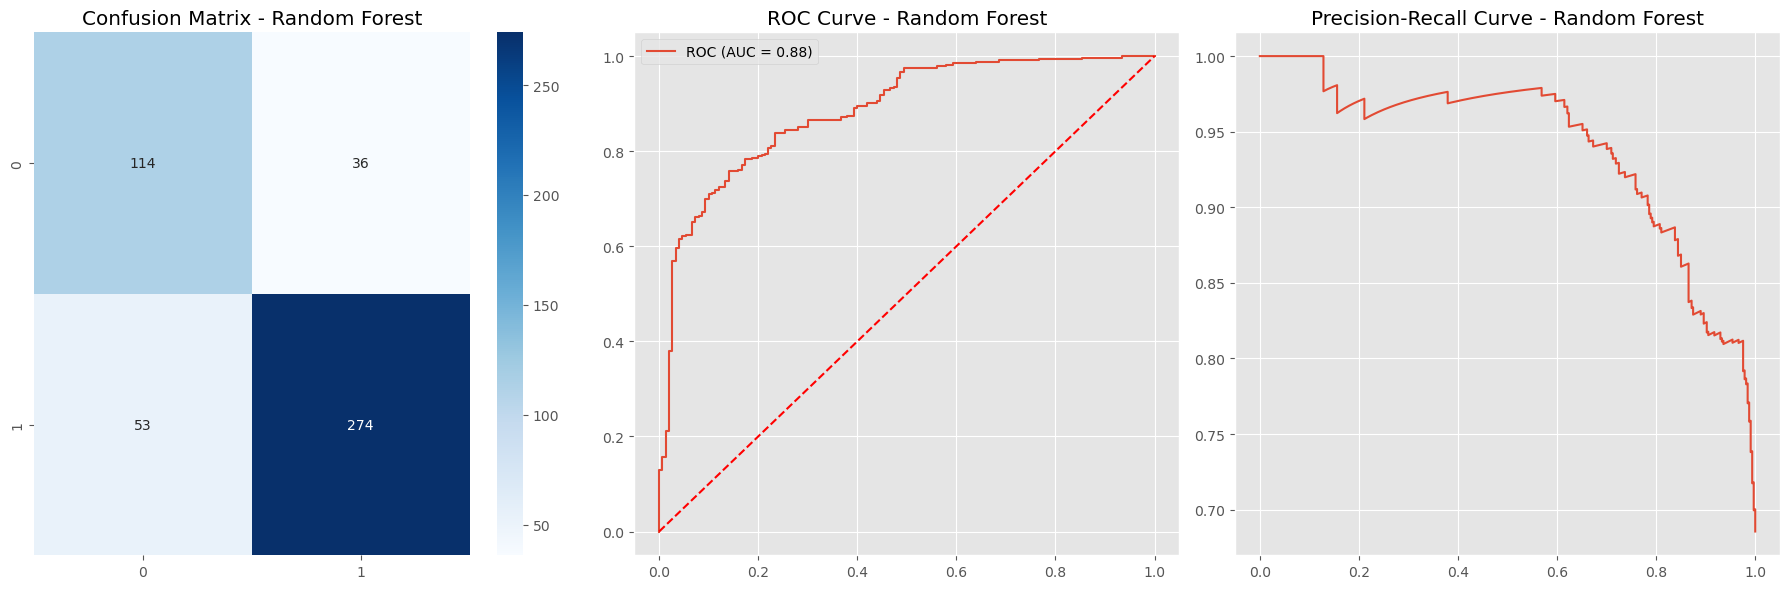

In [45]:
# Evaluate the model performance for the Random Forest model
evaluate_model_performance(rf_model, "Random Forest", xtest_scaled, ytest, results)

# **XGBoost**

In [46]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for XGBoost
param_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Calculate the weight ratio for handling class imbalance
weight_ratio = len(ytrain[ytrain==0]) / len(ytrain[ytrain==1])

# Create the GridSearchCV object for XGBoost
xgb_model = GridSearchCV(
    estimator=XGBClassifier(scale_pos_weight=weight_ratio, eval_metric='logloss', random_state=42),
    param_grid=param_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the model to the training data
xgb_model.fit(xtrain_scaled, ytrain)

# Retrieve the best parameters and the best score
best_params_xgb = xgb_model.best_params_
best_score_xgb = xgb_model.best_score_

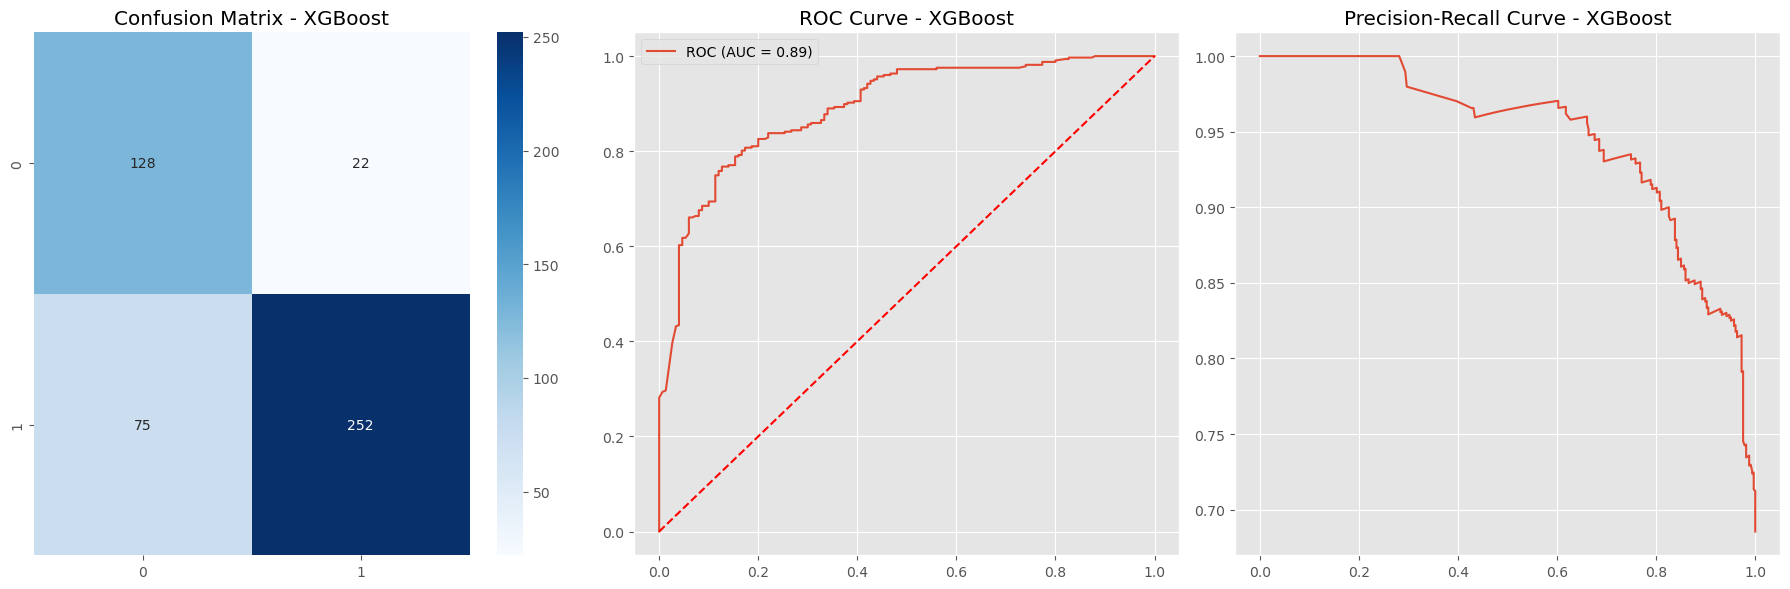

In [49]:
# Evaluate the model performance for the XGBoost model
evaluate_model_performance(xgb_model, "XGBoost", xtest_scaled, ytest, results)

# **Feature Importance**

- **Date of Joining (Year)** holds the highest importance, indicating that the year in which a driver joined the company has a strong relationship with the likelihood of attrition.

- **Quarterly Rating** is highly important, implying that drivers' ratings are a significant predictor of their attrition risk

- **Total Business Values** contribution of a driver to the business, which is a critical factor in understanding retention.

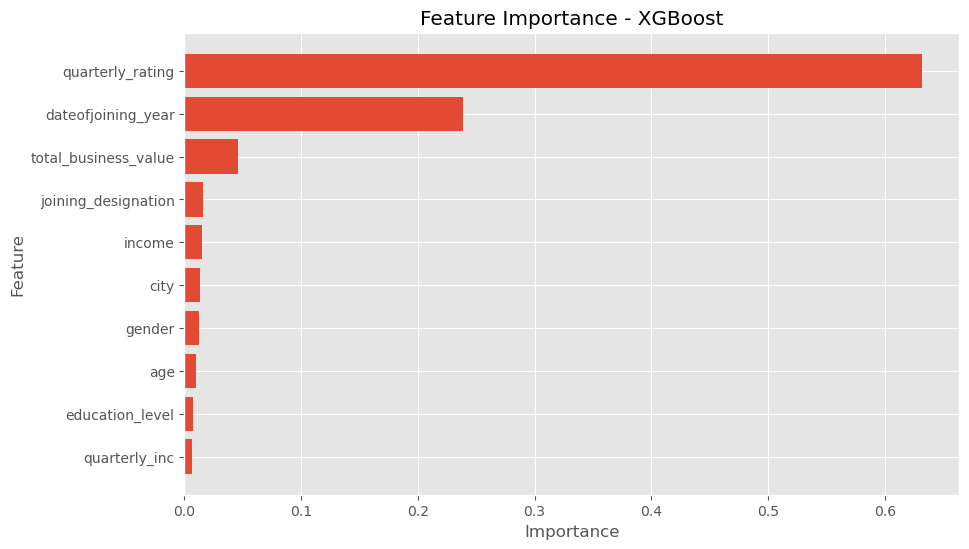

In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, model_name, feature_names, top_n=10):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])
    else:
        print(f"Feature importance is not available for the {model_name}.")
        return

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False).head(top_n)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title(f'Feature Importance - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.show()

# Plot feature importance for the XGBoost model
plot_feature_importance(xgb_model.best_estimator_, "XGBoost", xtrain.columns, top_n=10)

# **Model Result**

In [51]:
# Convert the results dictionary to a DataFrame and transpose it
result_df = pd.DataFrame(results).T

# Display the DataFrame
result_df

,Precision,Recall,F1 Score,Test ROC-AUC
Logistic Regression,0.855305,0.813456,0.833856,0.865912
Random Forest,0.883871,0.837920,0.860283,0.884771
XGBoost,0.919708,0.770642,0.838602,0.890693
